# AIML Lab 6: Unsupervised Learning

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Clustering

In [7]:
iris = load_iris()

model = KMeans(n_clusters=3)
model.fit(iris.data)
print(model)

KMeans(n_clusters=3)


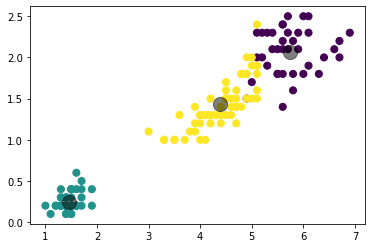

In [14]:
X = iris.data
cluster_labels = model.predict(X)

plt.scatter(X[:, 2], X[:, 3], c = cluster_labels, s = 50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s = 200, alpha=.5)
plt.show()

In [17]:
print(X.shape)

(150, 4)


In [23]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

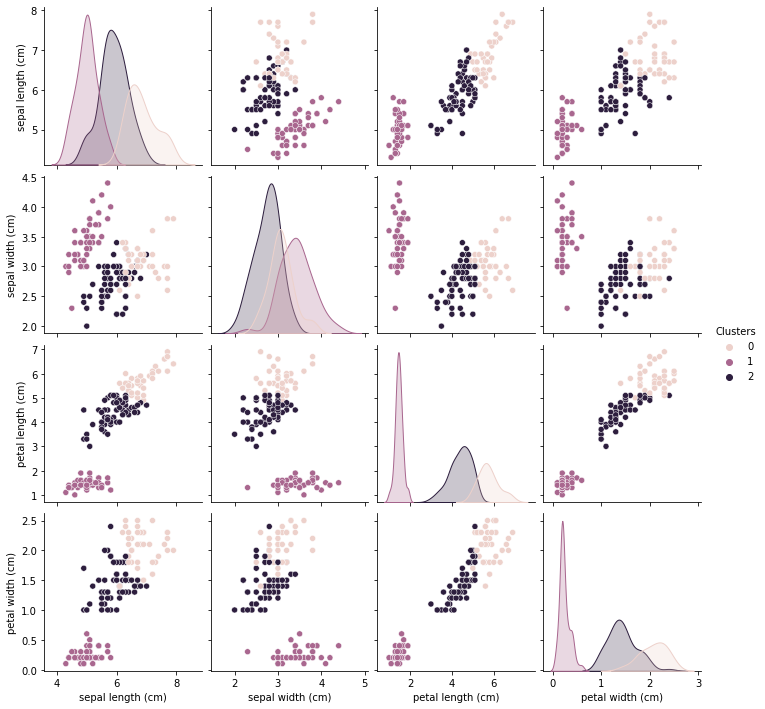

In [24]:
X_df = pd.DataFrame(X, columns=iris.feature_names)
X_df["Clusters"] = cluster_labels
sns.pairplot(X_df, hue="Clusters")

### Choosing the Number of Clusters
One way to select the number of clusters is to use the silhouette coefficient. The silhouette coefficient is defined for each sample and is composed of two scores.
- $a$: The mean distance between a sample and all other points in the same class/cluster (within cluster closeness)
- $b$: The mean distance between a sample and all other points in the next nearest cluster. (between cluster closeness)

The silhouette coefficient for a single sample is thus given as:
$$
s = \frac{b-a}{\max(a,b)}
$$
A ** higher silhouette coefficient** relates to a model with better defined clusters.
To get a higher silhouette score, the clusters must be far apart, with points in the cluster close to each other. 

In [25]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print(f"For n_clusters={n_cluster}, the silhouette coefficient is {sil_coeff}.")

For n_clusters=2, the silhouette coefficient is 0.6810461692117462.
For n_clusters=3, the silhouette coefficient is 0.5528190123564095.
For n_clusters=4, the silhouette coefficient is 0.49805050499728737.
For n_clusters=5, the silhouette coefficient is 0.48874888709310566.
For n_clusters=6, the silhouette coefficient is 0.36784649847122436.
For n_clusters=7, the silhouette coefficient is 0.3552757824966871.
For n_clusters=8, the silhouette coefficient is 0.3538958470891033.
For n_clusters=9, the silhouette coefficient is 0.3173815430773622.
For n_clusters=10, the silhouette coefficient is 0.3143629866818101.


Although the number of clusters with the highest silhouette coefficient is 2, we know from our dataset knowledge that we actually have 3 classes. This tells us that one of the classes is not well defined, and its features overlaps another class. But given our dataset knowledge, we will pick 3 clusters.

## Anomaly Detection

### Anomaly Detection with K-Means
We can use a k-means clustering algorithm to to perform anomaly detection/outlier detection by setting the number of clusters to be one. Points far away from the centre are considered to be anomalies. Note that K-Means has an inducive bias, assuming the clusters are convexed shape. If this assumption does not hold, then using K-Means for anomaly detection may not make sense.

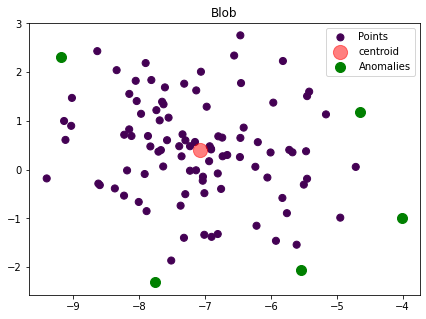

In [31]:
X, label = make_blobs(100, centers = 1)

kmeans = KMeans(n_clusters=1)
cluster_labels = kmeans.fit_predict(X)

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Blob")

ax.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='centroid')
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5]
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1], edgecolors='g', facecolors='g', label='Anomalies', s=100)
ax.legend()